# Approach 1: ipywidgets with inline backend

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

def f(x_vec, A):
    return A * np.sin(x_vec)

x_vec = np.arange(0, 10, .1)

# Update sliders.
def remake_plot(A):
    fig, ax = plt.subplots()
    ax.plot(x_vec, A * np.sin(x_vec))
    ax.set_ylim([-1, 1])

ipywidgets.interact(remake_plot, 
                    A=ipywidgets.FloatSlider(min=0, max=1, step=.01), 
                    continuous_update=False);

interactive(children=(FloatSlider(value=0.0, description='A', max=1.0, step=0.01), Output()), _dom_classes=('w…

**Pros.** 
1. Works with `%matplotlib inline` backend.
2. Works with Google Colab and CoCalc.

**Cons.**
1. Slow, because the plot reconstructed from scratch each time. This can be mitigated by using `ipywidgets.interact_manual()` instead, but then you don't get continuous feedback.

# Approach 2: matplotlib.widgets sliders with notebook backend

<IPython.core.display.Javascript object>


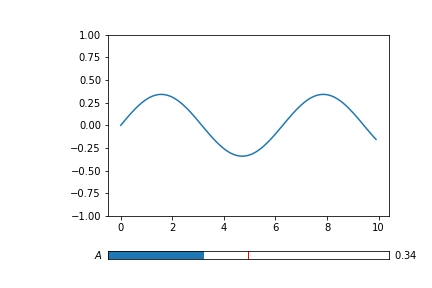

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def f(x_vec, A):
    return A * np.sin(x_vec)

x_vec, A = np.arange(0, 10, .1), .5

# Initialize the plot.
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)  # Make room for sliders.
[line] = ax.plot(x_vec, f(x_vec, A))
ax.set_ylim([-1, 1])

# Create parameter sliders.
ax_A = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_A = Slider(ax_A, label='$A$', valmin=0, valmax=1, valinit=A)

# Update sliders.
def update_plot(val):
    A = slider_A.val
    line.set_ydata(f(x_vec, A))
    fig.canvas.draw_idle()  # Redraw with new slider parameters.

slider_A.on_changed(update_plot);

**Pros.** 
1. Fast, because the plot elements are updated and not reconstructed from scratch.
2. More interactive. In addition to sliders, can zoom, pan, and hover mouse to get coordinates.

**Cons.**
1. Doesn't work with `%matplotlib inline` backend.
2. Doesn't work with Google Colab and CoCald. (Javascript/backend issue?)
3. More complex? Certainly more lines of code.